#<font color="green">Exploring the titanic data

#<font color="red">Lesson 1


In [ ]:
#data analysis packages
from ast import increment_lineno
import pandas as pd
import numpy as np
import random as rnd

#visullizasion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df=pd.read_csv(r'/content/drive/MyDrive/Machine_Learning/train.csv')
test_df=pd.read_csv(r'/content/drive/MyDrive/Machine_Learning/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df.head()

#טיפה היפוטזות
1. אנחנו מאמינים שיש לילדים יותר סיכוי לשרוד
2. באותה צורה כמו ילדים גם נשים
3. אם אתה עשיר יש לך הרבה יותר סיכוי לשרוד
4. אולי אם היית עובד , היו לך יותר סיכויים לשרוד


#Some questions :
1. how many nulls we have in each column , if we have too much then we would like to dispose the column.
2. which columns are more important .
3. is there any coralation between rows .
4. is the data sorted .
5. we need to convert the data to numeric data
6. maybe we need to normalize our data , and which matric is the right one to use in each case.  
7. if the number of nulls in reasonable then we have to predict the value by other columns , avarage+varience (the type od probability space will define the distribution ), median .
8. Graphs graphs histograms histograms .
9. we will try to omit edge cases !


In [ ]:
#how many nulls we have in the train data ???
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#how many nulls we have in the test data ???
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


we see that there is a corellation the datas , which is ideal for us

#<font color="red">Lesson 2


The most important value for us is survived , so lets explore it :



In [ ]:
train_df["Survived"].sum()

342

when we will try to explore the p-class , its colum number is 3 , since in python we enumerate from 0 .


In [ ]:
train_df[train_df.columns[2]]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
train_df.iloc[:,3]

what is the advantege of iloc over regular syntax ? in iloc we can find specific values in the table .


In [ ]:
train_df.loc[train_df["Embarked"]=='Q']

Maybe we would like to find more then one value, the next line is searching rows that have the 2 values , we did not specify any columns to the searching . (.any(1))

In [ ]:
search_val=train_df[train_df.isin(["Male","330877"]).any(1)]
search_val

we need to remember that train_df is a matrix 819 X 12
    

lets see diffrent syntax of printing single rows

In [ ]:
train_df.iloc[0]

In [ ]:
train_df["Name"][0]

'Braund, Mr. Owen Harris'

In [ ]:
train_df.iloc[0:4]

In [ ]:
train_df.iloc[[0,4]]

if we would like to reduce the matrix we can define new dataframe :

In [ ]:
age_sex=train_df[["Age","Sex"]]

In [ ]:
#lest make sure that it is indeed a dataframe
type(age_sex)


In [ ]:
#we can explore specific variables
above_35=age_sex[age_sex["Age"]>35]
above_35

In [ ]:
#if we would like to use it as an indicator
indicator=above_35["Age"]>70
indicator.head()
#and lets see how many trues we have :
sum(indicator)

5

In [ ]:
# In a similar way we can explore only specific classes
class_12=train_df[train_df["Pclass"].isin([1,2])]
class_12.head()

In [ ]:
class_23=train_df[(train_df["Pclass"]==2)|(train_df["Pclass"]==3)]
class_23.head()

In [ ]:
#These are the only values that the rows Pclass obtains
train_df["Pclass"].unique()

##Notice
1.if we would like to change type of a variable we use the function "astype"

2.We can define a mathematical norm

if we would like to normalize a column we can define it as a function

In [ ]:
#the norm will be define by Age range , which will be defined as follow
Age_range=max(train_df["Age"])-min(train_df["Age"])


In [ ]:
# the age after normalizing . First option
Age_norm=train_df.assign(normalizing_age=lambda x:((x["Age"]-min(train_df["Age"]))/Age_range))
Age_norm.head()

In [ ]:
min(Age_norm["normalizing_age"]),max(Age_norm["normalizing_age"])

#<font color="red">Lesson 3</font>
   our main goal is to get idea of the statistics in this data



In [ ]:
# lets sort all passengers by the ticket Fare
train_df.sort_values(by=["Fare"])


In [ ]:
#this is the null report of the data :
train_df.info()

In [ ]:
#lets plot some statistics
#avarage, varience(std) , mean , max ... etc , respective to each column
train_df.describe()

In [ ]:
#lets locate the oldest person (loc stands for locate)- plots only numerical results , if we would like string results we will have to use another command
train_df.loc[train_df["Age"]==80]

In [ ]:
#plots string instead of numerical info :
train_df.describe(include="O")

       we would like to compare the target ( survive ) to each of the columns

In [ ]:
# lets compare the connection between sex and survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

  our hypotesis is true !! more woman survived indeed . Therefore this variable is important
  

In [ ]:
# in the same way we can explore the connection with p-class
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


    the table above shows the probability to survive in each class
    we see that rich people indeed had a better chance to survive
    

In [ ]:
#lets make sure that the first class is indeed the priciest out of all
train_df[["Pclass","Fare"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Fare",ascending=False)

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


lets check out the distribution :

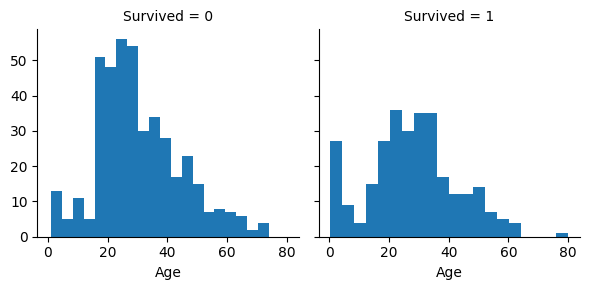

In [ ]:
#plot histograms
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)

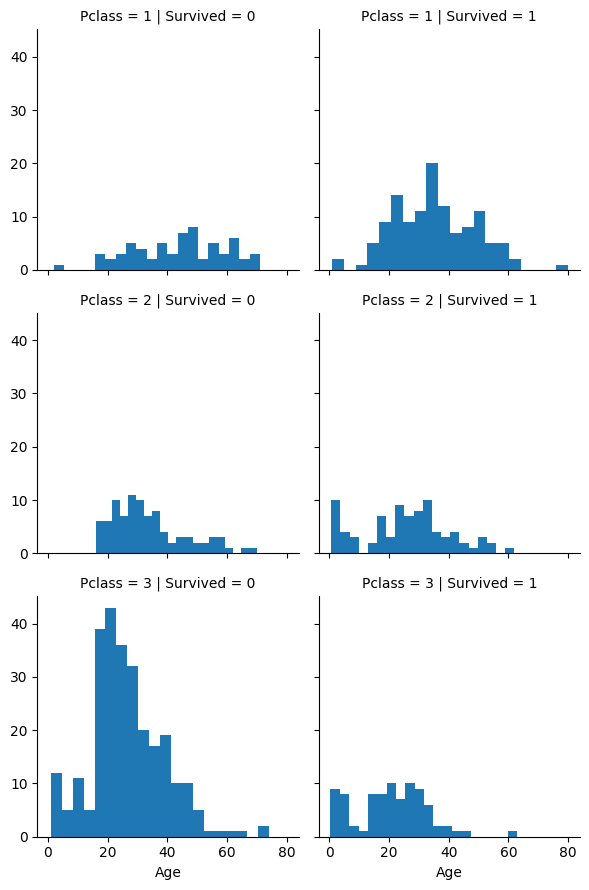

In [ ]:
g=sns.FacetGrid(train_df,col="Survived",row="Pclass")
g.map(plt.hist,"Age",bins=20)

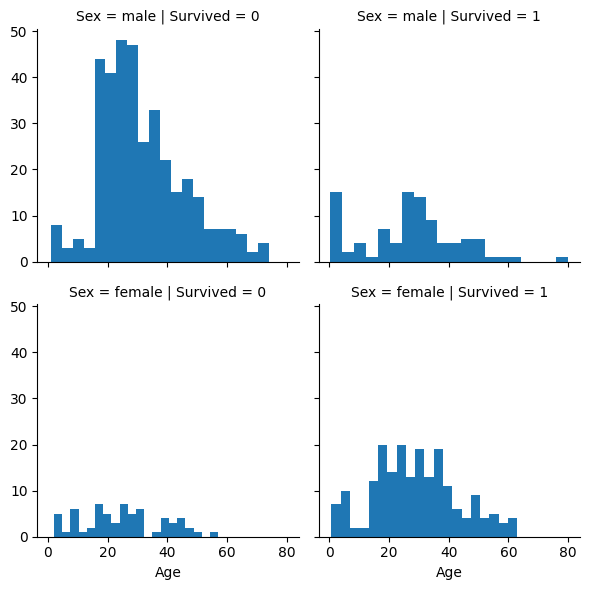

In [ ]:
g=sns.FacetGrid(train_df,col="Survived",row="Sex")
g.map(plt.hist,"Age",bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


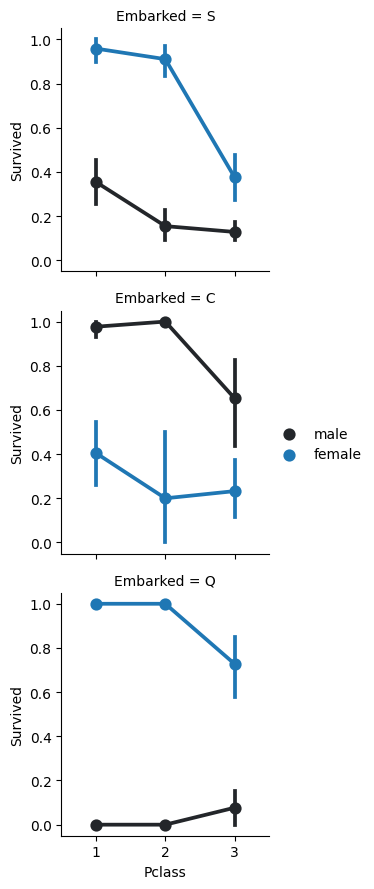

In [ ]:
grid=sns.FacetGrid(train_df,row="Embarked",)
grid.map(sns.pointplot, 'Pclass','Survived','Sex')#,platte='deep'
grid.add_legend()